In [10]:
!pip install xgboost

     |████████████████████████████████| 127.6MB 973bytes/s  0:00:01   |▏                               | 552kB 633kB/s eta 0:03:21     |██▉                             | 11.2MB 416kB/s eta 0:04:40     |█████▎                          | 21.2MB 1.7MB/s eta 0:01:04     |████████                        | 32.2MB 98kB/s eta 0:16:09     |████████▋                       | 34.5MB 672kB/s eta 0:02:1945     |██████████▋                     | 42.1MB 5.3MB/s eta 0:00:17     |██████████▋                     | 42.3MB 5.3MB/s eta 0:00:17.6MB 5.3MB/s eta 0:00:17     |████████████▏                   | 48.4MB 4.2MB/s eta 0:00:19     |█████████████                   | 52.0MB 1.4MB/s eta 0:00:55     |█████████████                   | 52.1MB 1.4MB/s eta 0:00:55     |█████████████▊                  | 54.5MB 420kB/s eta 0:02:54█████▍               | 65.1MB 95kB/s eta 0:10:51     |████████████████▍               | 65.4MB 73kB/s eta 0:14:01     |████████████████▍               | 65.5MB 73kB/s eta 0:14:00     |█

In [3]:
#Importing all required libraries for ML model
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
#This reads the data from the parkinsons.data file and prints out the first 5 lines
df=pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
#This code distinguishes the features from the labels through the use of DataFrame
features=df.loc[:,df.columns!='status'].values[:,1:]
labels= df.loc[:,'status'].values

In [7]:
#Here we are using the status column to determine which people have parkinsons an which are healthy
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [8]:
#In this code we use the MinMaxScaler to normalise the features between (-1 and 1)
scaler=MinMaxScaler((-1,1))
#Then we use fit_transform to fit the data and transform it
x=scaler.fit_transform(features)
y=labels

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [10]:
#We use the train_test_split to split the data allocating 80% to training and 20% to testing
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [11]:
#This code uses the XGBClassifier to train our model, XGboost is a gradient booster meaning that it combiones weak classifiers to produce a powerful commitee
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [12]:
#Calculates the Accuracy of the predictions
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [14]:
#This code creates a confusion matrix which determines how many times the model predicted correctly
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 6,  1],
       [ 1, 31]])

In [15]:
#Generates a set of prediction probabilities for the data set 
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(x_test)

In [16]:
#Testing how many outputs from the model where predicted correctly using a roc auc score
roc_auc_score(y_test, probabilities[:, 1])

0.9910714285714286

Predicting Parkinsons with UDPRS data

In [51]:
#This reads the data from the parkinsons_updrs.data file and prints out the first 5 lines
udf=pd.read_csv('parkinsons_updrs.data')
udf.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [52]:
#This code distinguishes the features from the labels through the use of DataFrame
#In this dataset we want to know about the motor_UPDRS score anf the total_UPDRS score as they will be the indicators of who has parkinsons
features=udf.loc[:, (udf.columns != 'motor_UPDRS') & (udf.columns != 'total_UPDRS')].values[:, 1:]
labels=udf.loc[:, (udf.columns == 'motor_UPDRS') | (udf.columns == 'total_UPDRS')  ].values

In [57]:
#This code normalises the data from -1 to 1 and then transforms the data set to fit for features and labels
x=scaler.fit_transform(features)
y=scaler.fit_transform(labels)

In [58]:
#Here we do the normal train_test_split to split our data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [89]:
#Heres where it gets interesting, below is a sequential NN
from keras.models import Sequential
from keras.layers import Dense
udf_model = Sequential()
#In the code below we are giving keras the amount of neurons for this layer and the shape of the train data
udf_model.add(Dense(32, input_shape=(x.shape[1],)) )
#In this line below we are setting a new amount of neurons = 16 and the activation method to tanh 
#I used tanh because it zero centered and models strongly positive values well
udf_model.add(Dense(16, activation='tanh'))
udf_model.add(Dense(8, activation='tanh'))
udf_model.add(Dense(72, activation='tanh'))\
#In the below line we give keras the shape of the y data and the activation method tanh
udf_model.add(Dense(y.shape[1], activation='tanh'))
#Finally we compile the model using optimizer model sgd, i used sgd as it gave the most accurate values for training and validation loss at 20 epochs
#We then set the loss to mean squared error because of the data we're using being linear
#And then we set the accuracy
udf_model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [90]:
#This fits all of the data together, i set a batch size of 1 because there were a small amount of records and we could afford to do it
#I then set the epochs to 20 because thats what seemed to have the most accurate validation and loss results
#And split the validation data to be 25% of the train data
hist=udf_model.fit(x_train, y_train, batch_size=1, epochs=20, validation_split=0.25)

Train on 3525 samples, validate on 1175 samples
Epoch 1/20
3525/3525 [==============================] - 53s 15ms/step - loss: 0.1919 - accuracy: 0.5696 - val_loss: 0.1847 - val_accuracy: 0.5523
Epoch 2/20
3525/3525 [==============================] - 54s 15ms/step - loss: 0.1727 - accuracy: 0.5759 - val_loss: 0.1835 - val_accuracy: 0.6034
Epoch 3/20
3525/3525 [==============================] - 55s 16ms/step - loss: 0.1594 - accuracy: 0.5909 - val_loss: 0.1671 - val_accuracy: 0.5770
Epoch 4/20
3525/3525 [==============================] - 55s 16ms/step - loss: 0.1494 - accuracy: 0.5852 - val_loss: 0.1401 - val_accuracy: 0.5983
Epoch 5/20
3525/3525 [==============================] - 53s 15ms/step - loss: 0.1421 - accuracy: 0.5991 - val_loss: 0.1789 - val_accuracy: 0.5932
Epoch 6/20
3525/3525 [==============================] - 52s 15ms/step - loss: 0.1365 - accuracy: 0.5901 - val_loss: 0.1315 - val_accuracy: 0.5762
Epoch 7/20
3525/3525 [==============================] - 54s 15ms/step - loss

[]

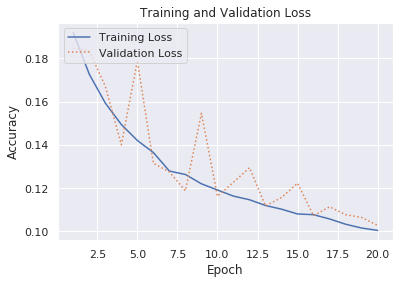

In [92]:
#This code plots the training and validation loss of the sgd optimizer with mean squared error loss at 20 epochs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
loss = hist.history['loss']
val = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-', label='Training Loss')
plt.plot(epochs, val, ':', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

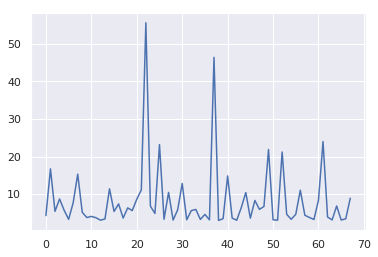

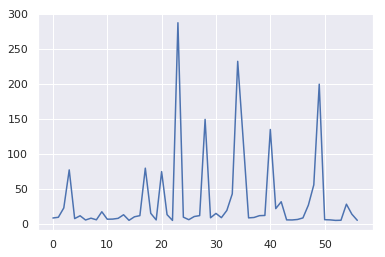

In [91]:
#Models the predictions for error based on the different test data
y_hat = udf_model.predict(x_test)
error = np.abs((y_hat - y_test) / y_test)
plt.show(plt.plot(error[:, 0][error[:, 0] > 3]))
plt.show(plt.plot(error[:, 1][error[:, 1] > 5]))